<a href="https://colab.research.google.com/github/AndDiCa/pythonML/blob/main/Tema_04_Ejercicio_Resuelto_Modelo_Prediccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo
## Paso 1: Importar las bibliotecas necesarias

Se importan las bibliotecas requeridas para el pipeline:


*   TensorFlow: Para construir y entrenar el modelo de ML.
*   Keras: API de alto nivel dentro de TensorFlow para diseñar redes neuronales.
*   Numpy y Pandas: Para manipulación de datos y arrays.
*   Matplotlib: Para visualizar curvas de pérdida y precisión.
*   Scikit-learn: Para normalización de datos y división de conjuntos de dato

In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Paso 2: Descargar el dataset Boston Housing

*   Se utiliza el dataset Boston Housing incluido en TensorFlow, que contiene datos sobre precios de viviendas en función de características como número de habitaciones, tamaño, etc.
*   Los datos se dividen automáticamente en:
  *   `X_train` y `y_train`: Conjunto de entrenamiento.
  *   `X_test` y `y_test`: Conjunto de prueba para evaluar el modelo.

In [2]:
# Paso 2: Cargar el dataset Boston Housing
# TODO: Completar este paso.
# Usa la función `boston_housing.load_data()` para cargar los datos en
# las variables X_train, y_train, X_test, y_test.

from tensorflow.keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# Verifica las dimensiones de los datos.
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Tamaño del conjunto de entrenamiento: (404, 13)
Tamaño del conjunto de prueba: (102, 13)


### Paso 2.5 Visualizar los datos
necesitamos saber si hay valores vacios y si necesitamos o no o bien de que forma normalizar, es decir revisar los rangos y escalas de nuestras variables.

In [14]:
# 2. Nombres de variables
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM",
    "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

# 3. Monta UN DataFrame sólo para inspección
df_inspeccion = pd.DataFrame(X_train, columns=feature_names)
df_inspeccion['MEDV'] = y_train

# 4. Ahora ya puedes ver la estructura y nombres de columna:
print("Columnas:", df_inspeccion.columns.tolist())
print("\nPrimeras filas (head):")
print(df_inspeccion.head())    # o .tail(), .sample(5), lo que prefieras

# 5. Si quieres borrarlo y volver a trabajar con arrays:
del df_inspeccion

Columnas: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

Primeras filas (head):
      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0  1.23247   0.0   8.14   0.0  0.538  6.142   91.7  3.9769   4.0  307.0   
1  0.02177  82.5   2.03   0.0  0.415  7.610   15.7  6.2700   2.0  348.0   
2  4.89822   0.0  18.10   0.0  0.631  4.970  100.0  1.3325  24.0  666.0   
3  0.03961   0.0   5.19   0.0  0.515  6.037   34.5  5.9853   5.0  224.0   
4  3.69311   0.0  18.10   0.0  0.713  6.376   88.4  2.5671  24.0  666.0   

   PTRATIO       B  LSTAT  MEDV  
0     21.0  396.90  18.72  15.2  
1     14.7  395.38   3.11  42.3  
2     20.2  375.52   3.26  50.0  
3     20.2  396.90   8.01  21.1  
4     20.2  391.43  14.65  17.7  


In [15]:

for col in houses.columns:
    vals = houses[col].dropna()
    mn, mx = vals.min(), vals.max()
    # Notación científica con dos decimales
    mn_sci = f"{mn:.2e}"
    mx_sci = f"{mx:.2e}"
    # Cálculo del exponente 10^x (evitamos log10(0))
    def exp10(v):
        return int(np.floor(np.log10(abs(v)))) if v != 0 else 0
    mn_exp = exp10(mn)
    mx_exp = exp10(mx)

    print(f"{col}:")
    print(f"  • Rango exacto: {mn_sci} a {mx_sci}")
    print(f"  • Aprox. potencias de diez: 10^{mn_exp} a 10^{mx_exp}\n")


CRIM:
  • Rango exacto: 6.32e-03 a 8.90e+01
  • Aprox. potencias de diez: 10^-3 a 10^1

ZN:
  • Rango exacto: 0.00e+00 a 1.00e+02
  • Aprox. potencias de diez: 10^0 a 10^2

INDUS:
  • Rango exacto: 4.60e-01 a 2.77e+01
  • Aprox. potencias de diez: 10^-1 a 10^1

CHAS:
  • Rango exacto: 0.00e+00 a 1.00e+00
  • Aprox. potencias de diez: 10^0 a 10^0

NOX:
  • Rango exacto: 3.85e-01 a 8.71e-01
  • Aprox. potencias de diez: 10^-1 a 10^-1

RM:
  • Rango exacto: 3.56e+00 a 8.78e+00
  • Aprox. potencias de diez: 10^0 a 10^0

AGE:
  • Rango exacto: 2.90e+00 a 1.00e+02
  • Aprox. potencias de diez: 10^0 a 10^2

DIS:
  • Rango exacto: 1.13e+00 a 1.21e+01
  • Aprox. potencias de diez: 10^0 a 10^1

RAD:
  • Rango exacto: 1.00e+00 a 2.40e+01
  • Aprox. potencias de diez: 10^0 a 10^1

TAX:
  • Rango exacto: 1.87e+02 a 7.11e+02
  • Aprox. potencias de diez: 10^2 a 10^2

PTRATIO:
  • Rango exacto: 1.26e+01 a 2.20e+01
  • Aprox. potencias de diez: 10^1 a 10^1

B:
  • Rango exacto: 3.20e-01 a 3.97e+02
  •

Podemos ver de inmediato que one hot encoding no sera realmente necesario dado que todos los valores son float64.

en cuanto a la normalisacion podemos ver que si es necesario, contamos con rangos desde 0.00n hasta 100n

### Ahora verificaremos valores faltantes

In [16]:
# Revisar la cantidad de valores faltantes (NaN) en cada columna
missing_counts = houses.isna().sum()
print("Valores faltantes por columna:")
print(missing_counts)

Valores faltantes por columna:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


Podemos ver que no tenemos valore faltantes pero en caso de que si los hubiera utilizariamos la siguiente herramienta

In [18]:
# Eliminar todas las filas que contengan al menos un valor faltante
houses = houses.dropna()

## Paso 3: Normalizar Datos
*   Propósito: Escalar las características para que tengan una distribución uniforme (media 0 y desviación estándar 1). Esto mejora la convergencia del modelo durante el entrenamiento.
*   `StandardScaler` ajusta el escalador (`fit`) en los datos de entrenamiento y transforma tanto los datos de entrenamiento como los de prueba.

In [19]:
# Paso 3: Normalizar los datos
# TODO: Normalizar los datos usando `StandardScaler` de Scikit-learn.
# Ajusta el escalador en X_train y luego transforma X_train y X_test.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Paso 4: Definir el modelo con `tf.keras`

1.   Construcción del modelo:

  * `Sequential`: Apila capas densas en orden secuencial.
  * Capa 1: 64 unidades con activación ReLU, tomando una entrada con la dimensión de las características (`X_train.shape[1]`).
  * Capa 2: 64 unidades adicionales con activación ReLU.
  * Capa de salida: Una neurona lineal para predecir valores continuos (regresión).

2.   Compilación del modelo:

  * Optimizador `adam`: Algoritmo adaptativo para ajustar los pesos del modelo.
  * Función de pérdida `mse`: Calcula el error cuadrático medio, adecuada para problemas de regresión.
  * Métrica `mae`: Error absoluto medio, más interpretable en términos de unidades.

In [20]:
# Paso 4: Definir el modelo con tf.keras
# TODO: Crear un modelo secuencial con dos capas densas de 64 unidades (ReLU)
# y una capa de salida lineal para regresión.
modelo = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

# Compilar el modelo con el optimizador Adam, pérdida MSE, y métrica MAE.
modelo.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Paso 5: Entrenar el modelo

* Entrenamiento:

  * `X_train` y `y_train`: Datos de entrada y etiquetas para ajustar el modelo.
  * Épocas: El modelo pasará 50 veces por todos los datos de entrenamiento.
  * Validation Split: Reserva el 20% de los datos de entrenamiento para evaluar el modelo después de cada época.
  * Verbose: Nivel de detalle mostrado durante el entrenamiento (1 = progresos detallados).

* Salida: El objeto historia almacena métricas como pérdida y precisión para análisis posterior.

In [21]:
# Paso 5: Entrenar el modelo
# TODO: Entrenar el modelo por 50 épocas con un 20% de validación.
historia = modelo.fit(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - loss: 569.7183 - mae: 22.1080 - val_loss: 599.7499 - val_mae: 22.7563
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 521.3351 - mae: 21.1635 - val_loss: 550.0276 - val_mae: 21.6730
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 487.2842 - mae: 19.9259 - val_loss: 487.8351 - val_mae: 20.2384
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 431.0826 - mae: 18.4730 - val_loss: 407.7893 - val_mae: 18.3225
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 320.6497 - mae: 15.9018 - val_loss: 312.1416 - val_mae: 15.7190
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 222.3191 - mae: 12.8953 - val_loss: 216.3153 - val_mae: 12.6143
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 152.3267 - mae: 10.3371 - val_loss: 134.7539 - val_mae: 9.4265
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 102.8940 - mae: 8.2206 - val_loss: 87.4973 - val_mae: 7.4605
Epoch 9/50
11/11 ━━━━━━━━

## Paso 6: Evaluar el modelo en los datos de Prueba

* Se evalúa el modelo entrenado en el conjunto de prueba (`X_test`, `y_test`).
* Métricas calculadas:
 * Pérdida (`mse`): Error cuadrático medio en los datos de prueba.
 * MAE: Promedio de las diferencias absolutas entre las predicciones y los valores reales.

In [22]:
# Paso 6: Evaluar el modelo en los datos de prueba
# TODO: Evaluar el modelo en X_test e imprimir la pérdida y MAE.
resultado = modelo.evaluate(X_test, y_test, verbose=0)
print("\nEvaluación en datos de prueba:")
print(f" - Pérdida (MSE): {resultado[0]}")
print(f" - Error Absoluto Medio (MAE): {resultado[1]}")


Evaluación en datos de prueba:
 - Pérdida (MSE): 24.612743377685547
 - Error Absoluto Medio (MAE): 3.349597454071045


## Paso 7: Visualización de las curvas de entrenamiento



*   Visualiza cómo cambia la pérdida (error) durante las épocas:
  *  `loss`: Pérdida en los datos de entrenamiento.
  *  `val_loss`: Pérdida en los datos de validación.
*   Interpretación:
  *   Si la pérdida de validación es significativamente mayor que la de entrenamiento, hay overfitting.
  *   Si ambas pérdidas no mejoran, el modelo podría estar subentrenado o necesitar ajustes.




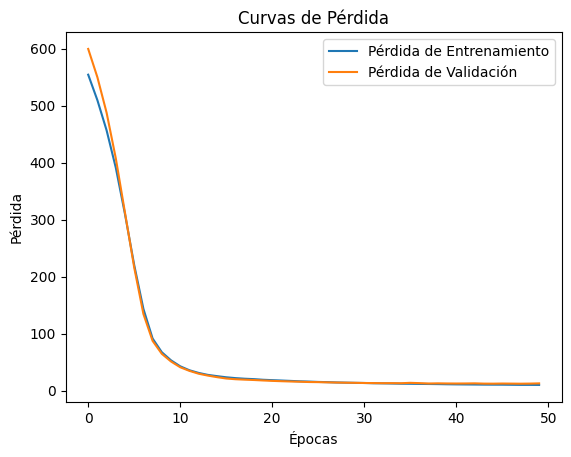

In [23]:
# Paso 7: Visualización de las curvas de entrenamiento
# TODO: Graficar las curvas de pérdida (entrenamiento y validación).
plt.plot(historia.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(historia.history['val_loss'], label='Pérdida de Validación')
plt.legend()
plt.title("Curvas de Pérdida")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.show()


## Paso 8: Hacer predicciones

* Se realizan predicciones en los primeros 10 ejemplos del conjunto de prueba.
* Compara los valores reales (`y_test`) con las predicciones del modelo para analizar su desempeño.

In [24]:
# Paso 8: Realizar predicciones
# TODO: Hacer predicciones con los primeros 10 ejemplos de X_test.
predicciones = modelo.predict(X_test[:10])
print("\nPredicciones para los primeros 10 ejemplos:")
for i, pred in enumerate(predicciones):
    print(f"Real: {y_test[i]:.2f}, Predicción: {pred[0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step

Predicciones para los primeros 10 ejemplos:
Real: 7.20, Predicción: 8.48
Real: 18.80, Predicción: 16.61
Real: 19.00, Predicción: 20.57
Real: 27.00, Predicción: 34.44
Real: 22.20, Predicción: 25.70
Real: 24.50, Predicción: 17.33
Real: 31.20, Predicción: 26.56
Real: 22.90, Predicción: 22.17
Real: 20.50, Predicción: 18.92
Real: 23.20, Predicción: 22.27


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


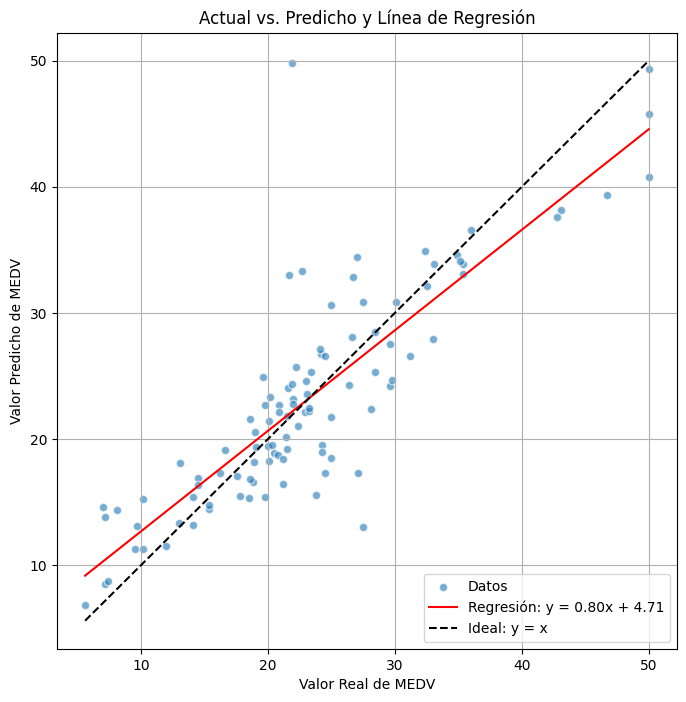

In [28]:

# Paso 8.2: Predecir los valores del conjunto de prueba
y_pred = modelo.predict(X_test).flatten()

# Paso 9: Graficar Predicho vs Real y línea de regresión
plt.figure(figsize=(8, 8))

# 9.1 Scatter de valores reales vs predichos
plt.scatter(y_test, y_pred, alpha=0.6, label='Datos', edgecolors='w')

# 9.2 Ajustar una línea de regresión simple (polinomio grado 1)
coef = np.polyfit(y_test, y_pred, 1)           # coef[0] pendiente, coef[1] intercepto
line_fn = np.poly1d(coef)

# 9.3 Crear valores para trazar la línea
x_line = np.linspace(np.min(y_test), np.max(y_test), 100)
plt.plot(x_line, line_fn(x_line), 'r-', label=f'Regresión: y = {coef[0]:.2f}x + {coef[1]:.2f}')

# 9.4 Línea de identidad (y = x) para referencia
plt.plot(x_line, x_line, 'k--', label='Ideal: y = x')

# 9.5 Detalles de la gráfica
plt.title('Actual vs. Predicho y Línea de Regresión')
plt.xlabel('Valor Real de MEDV')
plt.ylabel('Valor Predicho de MEDV')
plt.legend()
plt.grid(True)
plt.show()